<a href="https://colab.research.google.com/github/sivamsinghsh/The-Spark-Foundation-Internship/blob/main/Task_1_Prediction_Using_Supervised_ML_SHIVAM_SINGH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Shivam Singh

## GRIPFEB22 - The Spark Foundation- Data Science & Business Analytics Internship

### Task 1 : Simple Linear Regression
 - The problem statement is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hours/day.

#### Importing libraries
 - PANDAS,NUMPY for data manuplation.
 - Matplotlib,seaborn module for Data Visualisation.
 - sklearn for modelling

## Step 1: Reading and Understanding the Data

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data from the given url
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Inspect the various aspects of our dataframe

print("Rows :",data.shape[0])
print("Columns :",data.shape[1])

Rows : 25
Columns : 2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2 : Exploratory Data Analysis

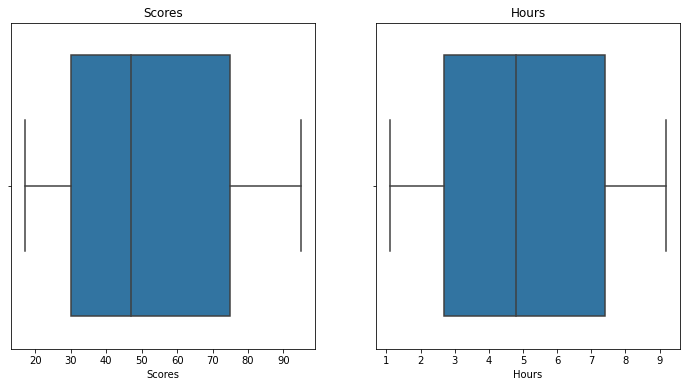

In [7]:
# To check for Outliers

fig = plt.figure(figsize=(12,6))

# putting ylim same for better visibility

ax1 = fig.add_subplot(1, 2, 1, title="Scores")
ax2 = fig.add_subplot(1, 2, 2, title="Hours")

sns.boxplot(data.Scores, ax=ax1)
sns.boxplot(data.Hours, ax=ax2)

plt.show()

No Outlier found to be treated henceforth.

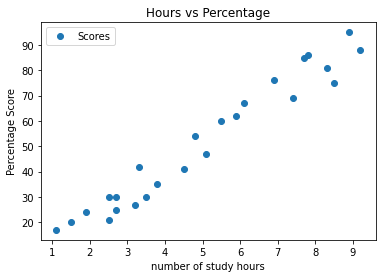

In [8]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can infer that there is a positive linear relation between the number of study hours and Percentage Score

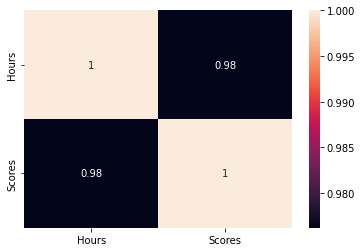

In [9]:
# To check for Correlation

sns.heatmap(data.corr(),annot=True)
plt.show()

Hours and Scores are highly Positively correlated to each other

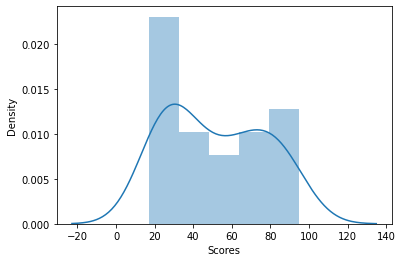

In [10]:
# To check for distribution of Scores in the dataset

sns.distplot(data['Scores'], bins=5)
plt.show()

Almost normally distributed with skew in the positive side Hence, we can perform a LINEAR REGRESSION to predict the values

## Step 3: Performing Simple Linear Regression

### Generic Steps in model building
   - First assign the feature variable, Hours to the variable X and the response variable, Score, to the variable y.
   - To divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#### Train-Test Split
   - To split our variable into training and testing sets.
   - Will perform this by importing train_test_split from the sklearn.model_selection library. 
   - It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
#Now let's take a look at train and test datasets individually

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [14]:
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [15]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88])

In [16]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [17]:
y_test

array([81, 30, 21, 76, 62])

##### After splitting the data into training and testing sets,finally it's the time to train our algorithm.

## Step 4 : Training Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


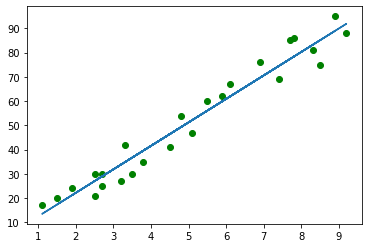

In [19]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'g')
plt.plot(X, line);
plt.show()

## Checking Accuracy Scores for both training as well as testing sets

In [20]:
print("Training Score:",lr.score(X_train,y_train)*100)
print("Testing Score:",lr.score(X_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


## Step 5: Predictions on the Test Set
 - Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [21]:
print("y_test :")
print(y_test)
print()
print("X_test :")
print(X_test)

y_test :
[81 30 21 76 62]

X_test :
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [22]:
y_pred = lr.predict(X_test) # Predicting the scores
print("y_pred :")
print(y_pred)

y_pred :
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [23]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


#### What will be predicted score if a student study for 9.25 hrs in a day?

In [24]:
# we can also test with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.38611528261494


## Final Step 6: Evaluating the model
 - The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [25]:
from sklearn import metrics

#### Mean Absolute Error

In [26]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


##### Root Mean Square Error

In [27]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 18.943211722315272


That means that the model doing great linear model as less MAE and good R-Square value

## Conclusion:

 - After Analysing the dataset we got Predicted score around 92 based on the number of study hours i.e., 9.25 hrs/day.
 
 